In [1]:
import h5py
import seaborn as sns
import matplotlib.pyplot as plt
from src.events.extract_events import process_signal
sns.set(rc={'figure.figsize':(10,5)})

In [2]:
raw_path = "data/medal-1-2017-01-16T09-04-39.578406T+0100-0010364.hdf5"
raw = h5py.File(raw_path, 'r')
raw_current = raw['current4']
idx = 5571000

current, _ = process_signal(raw, 4)

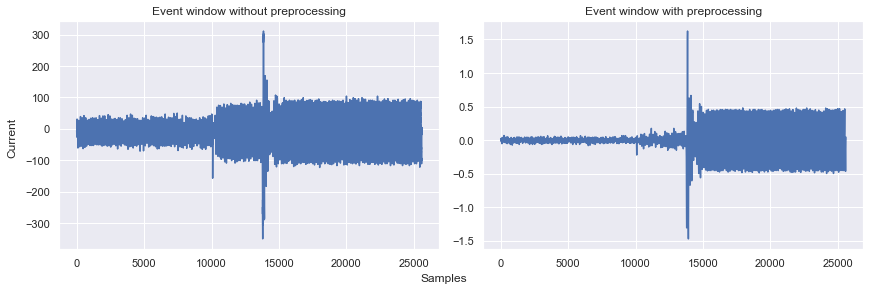

In [44]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

axes[0].plot(raw_current[idx:idx+25600])
axes[1].plot(current[idx:idx+25600])

fig.text(0.5, 0.01, 'Samples', ha='center', va='center')
fig.text(0.0, 0.5, 'Current', ha='center', va='center', rotation='vertical')

axes[0].set_title('Event window without preprocessing')
axes[1].set_title('Event window with preprocessing')

plt.tight_layout()
plt.savefig('figures/preprocessing.svg', dpi=300)
plt.show()
